Iteration 0: MSE=730.89, m=-1.0640, c=-1.4540
Iteration 100: MSE=inf, m=-11689113148686923001476509557651257102118769287316653269372606738495423930920287269104612608318112323143635396989978823948644712784703379386993264373480292352.0000, c=-22119918968096037077253159701904492541303109414321872993019683454047087125792288970373366559312935604840576893625945727749813058077524660452295565006340096.0000
Iteration 200: MSE=nan, m=nan, c=nan


C:\Users\Intern01\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Intern01\AppData\Local\Temp\ipykernel_6148\1003775169.py:25: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
C:\Users\Intern01\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Intern01\AppData\Local\Temp\ipykernel_6148\1003775169.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  m -= learning_rate * gradient_m


Iteration 300: MSE=nan, m=nan, c=nan
Iteration 400: MSE=nan, m=nan, c=nan
Iteration 500: MSE=nan, m=nan, c=nan
Iteration 600: MSE=nan, m=nan, c=nan
Iteration 700: MSE=nan, m=nan, c=nan
Iteration 800: MSE=nan, m=nan, c=nan
Iteration 900: MSE=nan, m=nan, c=nan


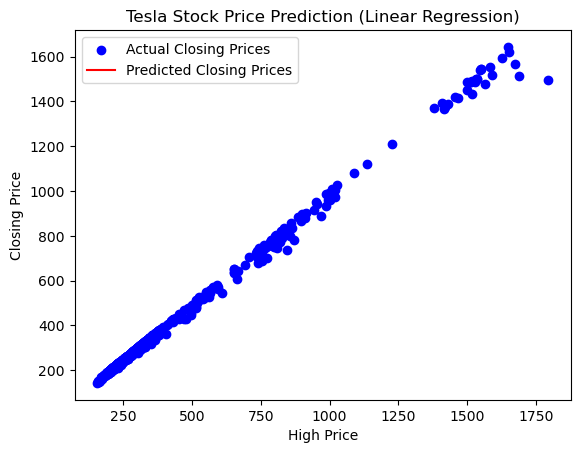

Best-fit Slope (m): nan
Best-fit Intercept (c): nan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Tesla stock data into a Pandas DataFrame
# Make sure your DataFrame has columns 'High' and 'Close'
# You can load the data from a CSV file or another source
# Replace 'tesla_stock_data.csv' with your data source
df = pd.read_csv(r"C:\Users\Intern01\Downloads\TSLA.csv")

# Extract the 'High' and 'Close' columns as NumPy arrays
X = df['High'].values
y = df['Close(t)'].values

# Define the learning rate and the number of iterations
learning_rate = 0.0001
iterations = 1000

# Initialize the slope (m) and intercept (c) with random values
m = np.random.randn()
c = np.random.randn()

# Define a function to compute the Mean Squared Error (MSE)
def compute_mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Gradient Descent
for i in range(iterations):
    # Calculate predictions using the current values of m and c
    y_pred = m * X + c
    
    # Calculate the gradients of the cost function with respect to m and c
    gradient_m = (-2/len(X)) * np.sum(X * (y - y_pred))
    gradient_c = (-2/len(X)) * np.sum(y - y_pred)
    
    # Update m and c using the gradients and learning rate
    m -= learning_rate * gradient_m
    c -= learning_rate * gradient_c
    
    # Calculate the current MSE
    mse = compute_mse(y, y_pred)
    
    if i % 100 == 0:
        print(f'Iteration {i}: MSE={mse:.2f}, m={m:.4f}, c={c:.4f}')

# Make predictions using the final values of m and c
y_pred_final = m * X + c

# Plot the results
plt.scatter(X, y, label='Actual Closing Prices', color='blue')
plt.plot(X, y_pred_final, label='Predicted Closing Prices', color='red')
plt.xlabel('High Price')
plt.ylabel('Closing Price')
plt.legend()
plt.title('Tesla Stock Price Prediction (Linear Regression)')
plt.show()

print(f"Best-fit Slope (m): {m:.4f}")
print(f"Best-fit Intercept (c): {c:.4f}")


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\Intern01\Downloads\TSLA.csv")
x= df['High'].values
y = df['Close(t)'].values
dates=df['Date'].values   #here we are basically extracting the columns from the dataframe and definig which is the dependent variable and which is the independent variable

m = 0  #initializing the slope and the intercept values
c = 0

x_scaled = (x- np.mean(X)) / np.std(x)  #here we feature scale the variables to avoid the overflow/underflow problem that might occur during performing the gradient descent
y_scaled = (y - np.mean(y)) / np.std(y)

L = 0.01  # The learning Rate
iteration= 1000  # The number of iterations to perform gradient descent

def MSE(y_test,y_pred):
    return((y_test-y_pred)**2).mean()  #this is basically a function that is used for determining the mean squared values 

n = float(len(x)) # Number of elements in X

# Performing Gradient Descent 
for i in range(iteration): 
    y_pred = m*x_scaled + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x_scaled * (y_scaled - y_pred))  # We calculate the derivative of m here
    D_c = (-2/n) * sum(y_scaled - y_pred)  #We calcukate the  derivative of c
    m = m - L * D_m  # Updating the values of m
    c = c - L * D_c  # Updating the values of c
    cost=MSE(y_scaled,y_pred) #calling the MSE function to find the cost/error
print (m, c,cost) 

0.9987897992654373 -1.2493344264925984e-16 0.0024189335255145545


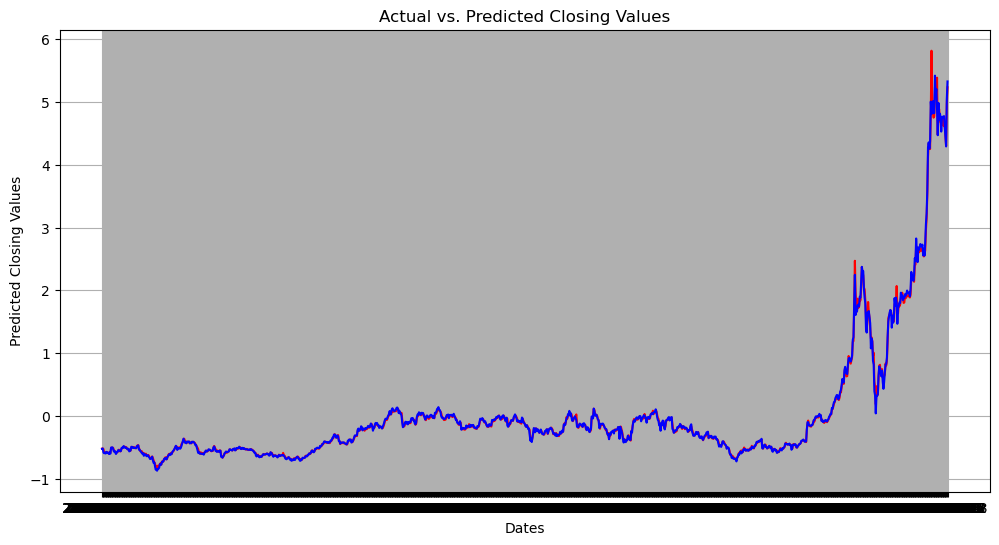

In [12]:
Y_pred = m*x_scaled + c
plt.figure(figsize=(12, 6))
plt.plot(dates, Y_pred,label="Actual vs. Predicted",color='red')
plt.plot(dates, y_scaled, color='blue', label="Ideal Fit")
plt.xlabel("Dates")
plt.ylabel("Predicted Closing Values")
plt.title("Actual vs. Predicted Closing Values")
plt.grid(True)
plt.show()